### **Build Recomendation Content Based**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving place_dataset.csv to place_dataset (6).csv


In [ ]:
# Reading the file
df = pd.read_csv("place_dataset.csv")

In [ ]:
df.head()

,No,city,place_id,place,category,rating,description,phone,sites,price,travel1,travel2,travel3,travel4,Unnamed: 14,Unnamed: 15
0,1.0,Bangkalan,1001.0,Agro Edu Wisata Kebun Bang Jani,Wisata Alam,4.1,Agro Edu Wisata Kebun Bang Jani offers an educ...,8.523122e+10,NaN,$,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,Bangkalan,1002.0,Pantai Rindu,Wisata Bahari,4.5,Pantai Rindu is a beautiful beach located in B...,NaN,NaN,$,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,Bangkalan,1003.0,Dermaga Rindu,Budaya,4.6,"Dermaga Rindu is located in Bangkalan, a popul...",NaN,https://bangsringunderwater.com/,$,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Bangkalan,1004.0,Pandela (Pantai Desa Lajing),Wisata Bahari,4.4,"Pandela Beach, located in Lajing Village, Bang...",8.133344e+10,NaN,$,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Bangkalan,1005.0,Pantai Biru,Wisata Bahari,4.6,"Located in Bangkalan, Pantai Biru is a stunnin...",8.585222e+10,http://mangrovebedul.blogspot.com/,$,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(columns=['No','phone', 'sites', 'travel1','travel2','travel3', 'travel4', 'Unnamed: 14','Unnamed: 15'],axis=1)
df.head()

,city,place_id,place,category,rating,description,price
0,Bangkalan,1001.0,Agro Edu Wisata Kebun Bang Jani,Wisata Alam,4.1,Agro Edu Wisata Kebun Bang Jani offers an educ...,$
1,Bangkalan,1002.0,Pantai Rindu,Wisata Bahari,4.5,Pantai Rindu is a beautiful beach located in B...,$
2,Bangkalan,1003.0,Dermaga Rindu,Budaya,4.6,"Dermaga Rindu is located in Bangkalan, a popul...",$
3,Bangkalan,1004.0,Pandela (Pantai Desa Lajing),Wisata Bahari,4.4,"Pandela Beach, located in Lajing Village, Bang...",$
4,Bangkalan,1005.0,Pantai Biru,Wisata Bahari,4.6,"Located in Bangkalan, Pantai Biru is a stunnin...",$


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         691 non-null    object 
 1   place_id     691 non-null    float64
 2   place        691 non-null    object 
 3   category     691 non-null    object 
 4   rating       691 non-null    float64
 5   description  691 non-null    object 
 6   price        691 non-null    object 
dtypes: float64(2), object(5)
memory usage: 103.5+ KB


In [ ]:
df = df.drop(df.index[691:])
df['place_id'] = df['place_id'].astype(int)
df['category'] = df['category'].replace('Wisata alam', 'Wisata Alam')
df

,city,place_id,place,category,rating,description,price
0,Bangkalan,1001,Agro Edu Wisata Kebun Bang Jani,Wisata Alam,4.1,Agro Edu Wisata Kebun Bang Jani offers an educ...,$
1,Bangkalan,1002,Pantai Rindu,Wisata Bahari,4.5,Pantai Rindu is a beautiful beach located in B...,$
2,Bangkalan,1003,Dermaga Rindu,Budaya,4.6,"Dermaga Rindu is located in Bangkalan, a popul...",$
3,Bangkalan,1004,Pandela (Pantai Desa Lajing),Wisata Bahari,4.4,"Pandela Beach, located in Lajing Village, Bang...",$
4,Bangkalan,1005,Pantai Biru,Wisata Bahari,4.6,"Located in Bangkalan, Pantai Biru is a stunnin...",$
...,...,...,...,...,...,...,...
686,Tulungagung,1687,Ori Green,Wisata Alam,4.6,Ori Green is a natural tourist destination loc...,$
687,Tulungagung,1688,Ratiban,Taman Hiburan,4.3,"Ratiban, located in Tulungagung, is a beautifu...",$
688,Tulungagung,1689,Museum Daerah,Budaya,4.5,Tulungagung District Museum is located in Tulu...,$
689,Tulungagung,1690,Museum Tulungagung,Budaya,4.7,Museum Tulungagung is a historical museum loca...,$


### **Exploratory Data Analysis**

In [ ]:
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['category'].unique()

array(['Wisata Alam', 'Wisata Bahari', 'Budaya', 'Taman Hiburan',
       'Wisata Religi'], dtype=object)

<ipython-input-80-4176a08ec8ce>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', order=ordered_categories, palette='viridis')


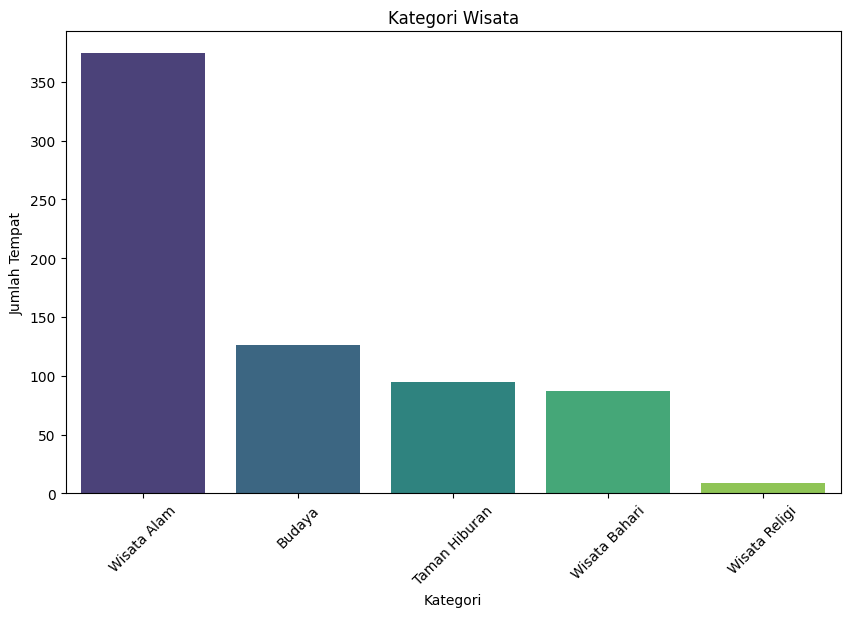

In [ ]:
category_counts = df['category'].value_counts()

ordered_categories = category_counts.index

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', order=ordered_categories, palette='viridis')
plt.title('Kategori Wisata')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Tempat')
plt.xticks(rotation=45)
plt.show()

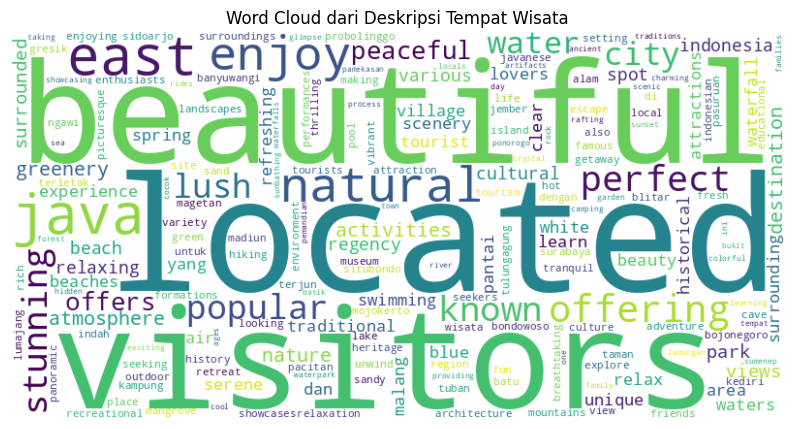

In [ ]:
# Membersihkan teks dan menghitung frekuensi kata
stop_words = set(stopwords.words('english'))
descriptions = ' '.join(df['description']).lower()
word_tokens = word_tokenize(descriptions)
filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]

# Hitung frekuensi kata
word_freq = Counter(filtered_words)

# Visualisasi Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Deskripsi Tempat Wisata')
plt.show()

In [ ]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [ ]:
# Applying all the functions in description and storing as a cleaned_desc
df['cleaned_desc'] = df['Place_Name'].apply(_removeNonAscii)
df['cleaned_desc'] = df.cleaned_desc.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

In [ ]:
# Function for recommending tourist destinations based on place name. It takes place name and category as an input.def recommend(place_name, category):
from sklearn.metrics.pairwise import cosine_similarity
# Matching the category with the dataset and reset the index
category = df['category']
City = df['city']

def recommend(place_name, category):
  data = df.loc[df['category'] == category]
  data.reset_index(level = 0, inplace = True)
  place_name = data['place']
    # Convert the index into series
  indices = pd.Series(data.index, index = data['place'])

    #Converting the place name into vectors and used bigram
  tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
  tfidf_matrix = tf.fit_transform(data['place'])

    # Calculating the similarity measures based on Cosine Similarity
  sg = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get the index corresponding to place name

  idx = indices[place_name]# Get the pairwsie similarity scores
  sig = list(enumerate(sg[idx]))# Sort the names
  sig = sorted(sig, key=lambda x: x[1][0], reverse=True)# Scores of the 5 most similar books
  sig = sig[1:11]# Book indicies
  tourist_indices = [i[0] for i in sig]

    # Top 10 tourist recommendation
  rec = data[['place', 'category']].iloc[tourist_indices]
  print(rec)

In [ ]:
recommend("Nama", "Taman Hiburan")

                        place       category
1          Atlanta Water Park  Taman Hiburan
2   Blue Lagoon Swimming Pool  Taman Hiburan
3     Taman Gandrung Terakota  Taman Hiburan
4          Kesambi Trees Park  Taman Hiburan
5      Kolam Renang Penataran  Taman Hiburan
6          Taman Ayu Gogoniti  Taman Hiburan
7                  Growgoland  Taman Hiburan
8    Pemandian Renang Karisma  Taman Hiburan
9         Sky Garden Wonoboyo  Taman Hiburan
10                  Dira Park  Taman Hiburan
